<a href="https://colab.research.google.com/github/k-ganda/sound_clustering/blob/main/notebook/clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [1]:
#Make allNecessary Imports
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
unlabelled_data_path = '/content/drive/MyDrive/unlabelled_sounds/unlabelled_sounds'

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)  # Mel Spectrogram
    mel_db = librosa.power_to_db(mel_spect, ref=np.max)  # Convert to dB scale
    return np.mean(mel_spect, axis=1) # Take the mean across time

# Load all sound files from the dataset and extract features
features = []
file_paths = [os.path.join(unlabelled_data_path, f) for f in os.listdir(unlabelled_data_path) if f.endswith('.wav')]

for file in file_paths:
    features.append(extract_features(file))



/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1547
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1892
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1772
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1880
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1593
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

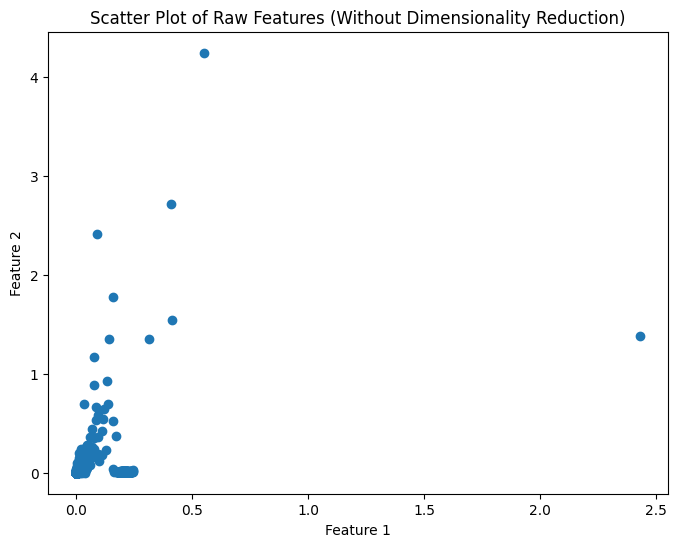

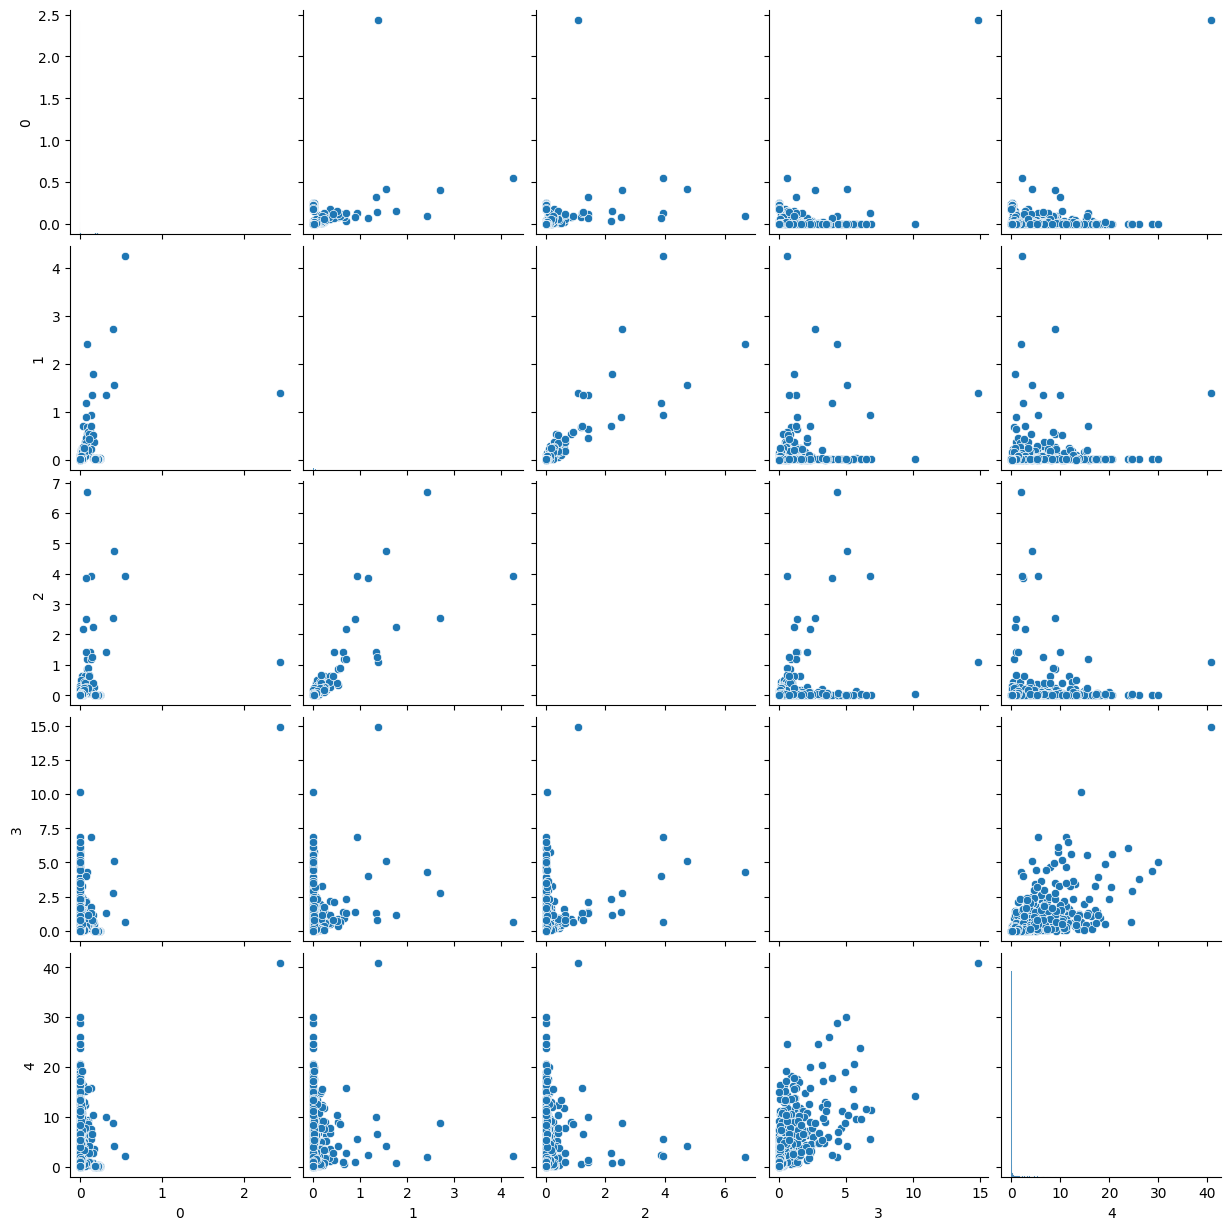

In [8]:
# Convert features list to a NumPy array for easier handling
features_array = np.array(features)

# Scatter plot (Attempt without dimensionality reduction) - Using first 2 features
plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1])  # Using first 2 features for plotting
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

# Pair plot (Only using first 5 features)
df = pd.DataFrame(features_array[:, :5])  # Create DataFrame using first 5 features
sns.pairplot(df)
plt.show()

# Why is dimensionality reduction important?



*   List item
*   List item

important?
(*Document any challenges/errors from the above experiments.*)

Error: ---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-9-037ee3828e1f> in <cell line: 0>()
      1 # Convert features list to a NumPy array for easier handling
----> 2 features_array = np.array(features)
      3
      4 # Scatter plot (Attempt without dimensionality reduction) - Using first 2 features
      5 plt.figure(figsize=(8, 6))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3000,) + inhomogeneous part.
* Inconsistent shaping.

Dimensionality reduction is crucial when dealing with high-dimensional data because it reduces the complexity of the data, making it easier to visualize and interpret. When we attempt to visualize raw high-dimensional features in a scatter plot, it is difficult to identify patterns, as the data points may overlap or form a convoluted structure. High-dimensional data is often sparse, and visualizing it in two or three dimensions can fail to capture the underlying structure of the data. Dimensionality reduction techniques like PCA and t-SNE help by projecting the data into lower dimensions, where it is easier to visualize potential clusters and gain insights into the data structure.

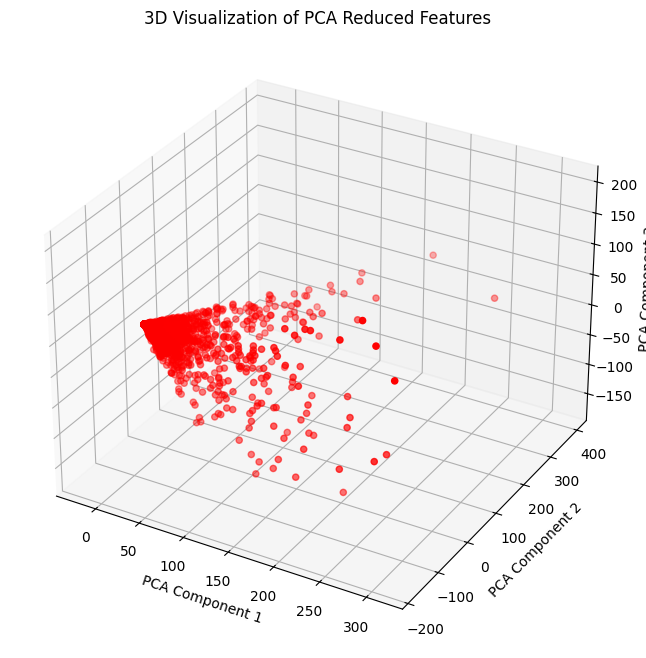

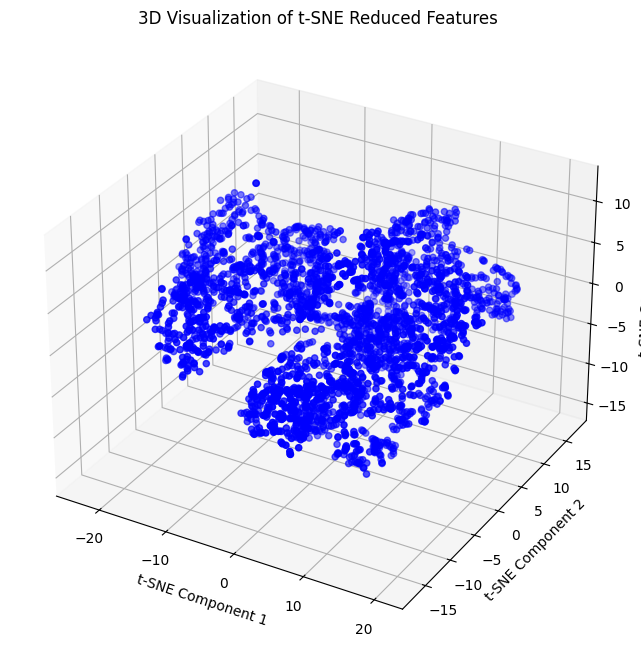

In [29]:
from mpl_toolkits.mplot3d import Axes3D
# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_array)

# 3D Visualization goes here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c='r', marker='o')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Visualization of PCA Reduced Features')
plt.show()

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3)
features_tsne = tsne.fit_transform(features_array)

# 3D Visualization for t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], c='b', marker='o')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D Visualization of t-SNE Reduced Features')
plt.show()


# Which method (PCA or t-SNE) provides better separability of clusters and why?(Based on the visualizations)

Based on the visualizations, **t-SNE** appears to provide better separability of clusters compared to PCA.

In the t-SNE visualization, data points exhibit a clearer grouping tendency. While the points still look like one cloud and some overlap present, there are hints of separate clusters that we can visually distinguish.

In contrast, the PCA visualization shows a more diffuse, elongated cloud of points. While some spread is present, it is difficult to visually distinguish clear clusters. This suggests that PCA may not be as effective in capturing the complex relationships within the data, hindering the identification of distinct groups.


**Reasons:**

1. **Non-linearity:** t-SNE is a non-linear dimensionality reduction technique, which allows it to capture complex, non-linear relationships in the data. PCA, on the other hand, is a linear technique. If the underlying data has non-linear structure, t-SNE is more likely to reveal it.

2.  t-SNE focuses on preserving local similarities between data points, which can help in revealing clusters or groups that are close together in the original high-dimensional space. PCA focuses on preserving global variance, which might obscure local structure.


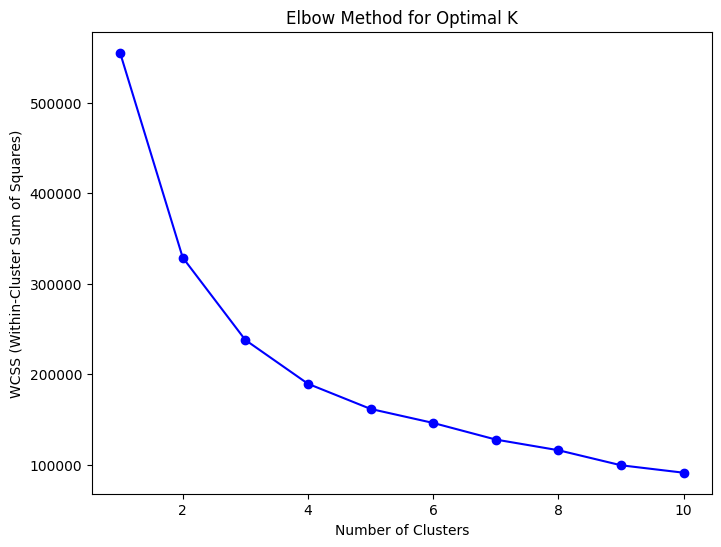

In [30]:

# Optimize number of clusters using Elbow Method

# Initialize an empty list to store the WCSS (Within-Cluster Sum of Squares)
wcss = []

# Loop through different values of k (number of clusters)
for k in range(1, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_tsne)
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()



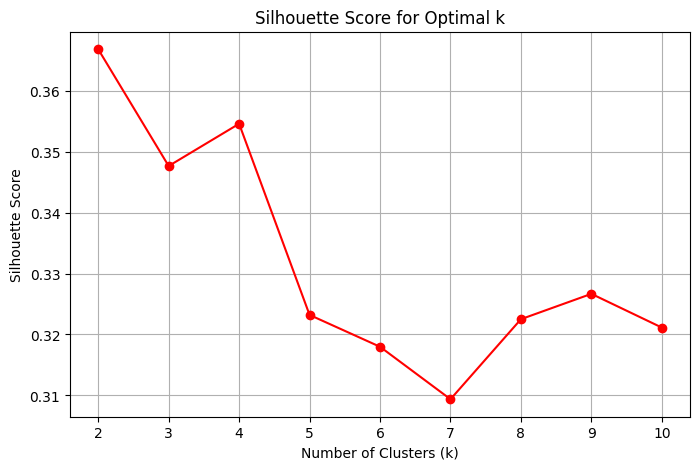

Optimal number of clusters (k) based on Silhouette Score: 2


In [22]:
# Optimize number of clusters using Silhouette Score
silhouette_scores = []

for k in range(2, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_tsne)
    # Calculate and append the silhouette score for the current k
    score = silhouette_score(features_tsne, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Find the best k with highest silhouette score
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (k) based on Silhouette Score: {optimal_k}')

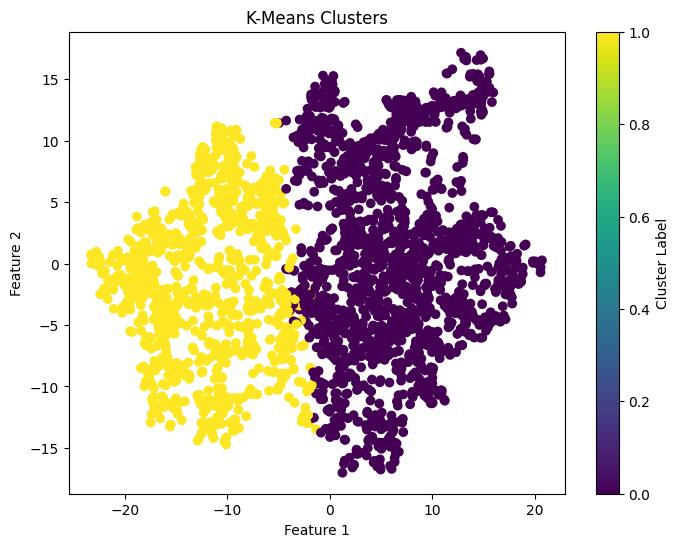

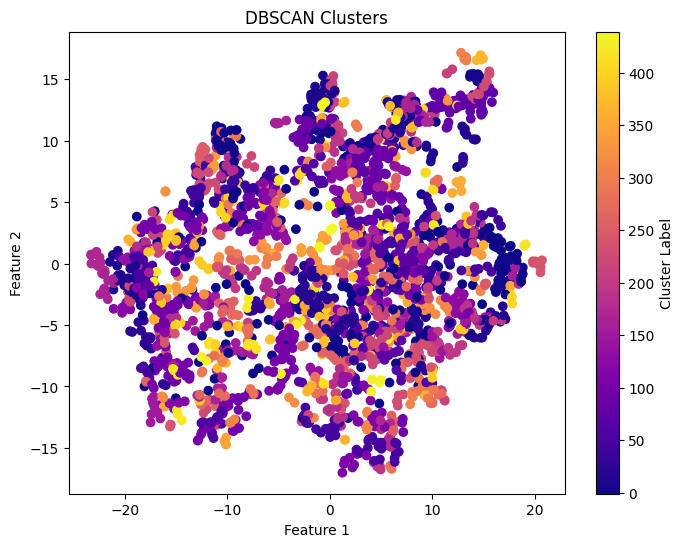

In [43]:

# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_tsne)

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan_labels = dbscan.fit_predict(features_tsne)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=dbscan_labels, cmap='plasma', marker='o')
plt.title("DBSCAN Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()


In [44]:

# Evaluate clustering
kmeans_silhouette = silhouette_score(features_tsne, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_tsne, kmeans_labels)
kmeans_inertia = kmeans.inertia_

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_tsne, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features_tsne, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}, Inertia: {kmeans_inertia}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.3648, Davies-Bouldin Index: 1.0614, Inertia: 329003.9375
DBSCAN - Silhouette Score: 0.2466, Davies-Bouldin Index: 1.2452


In [42]:
# Define a range of eps and min_samples values to test
eps_values = np.arange(1, 10, 1)  # Testing eps from 1 to 10
min_samples_values = [2, 3, 5, 10]  # Testing different min_samples values

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(features_tsne)

        # Only evaluate if DBSCAN creates more than 1 cluster
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(features_tsne, dbscan_labels)
            db_index = davies_bouldin_score(features_tsne, dbscan_labels)

            print(f"DBSCAN - eps: {eps}, min_samples: {min_samples}, Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {db_index:.4f}")

            # Track the best performing parameters
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

# Print best parameters
if best_eps is not None:
    print(f"\nBest DBSCAN parameters: eps = {best_eps}, min_samples = {best_min_samples}, Silhouette Score = {best_silhouette:.4f}")
else:
    print("DBSCAN still did not form meaningful clusters.")

DBSCAN - eps: 1, min_samples: 2, Silhouette Score: 0.2466, Davies-Bouldin Index: 1.2452
DBSCAN - eps: 1, min_samples: 3, Silhouette Score: 0.1656, Davies-Bouldin Index: 1.2156
DBSCAN - eps: 1, min_samples: 5, Silhouette Score: -0.0719, Davies-Bouldin Index: 1.1887
DBSCAN - eps: 1, min_samples: 10, Silhouette Score: -0.5238, Davies-Bouldin Index: 1.0076
DBSCAN - eps: 2, min_samples: 2, Silhouette Score: -0.5766, Davies-Bouldin Index: 2.1116
DBSCAN - eps: 2, min_samples: 3, Silhouette Score: -0.5670, Davies-Bouldin Index: 2.1519
DBSCAN - eps: 2, min_samples: 5, Silhouette Score: -0.4826, Davies-Bouldin Index: 2.4983
DBSCAN - eps: 2, min_samples: 10, Silhouette Score: -0.1015, Davies-Bouldin Index: 1.4826
DBSCAN - eps: 3, min_samples: 10, Silhouette Score: -0.0591, Davies-Bouldin Index: 0.9797

Best DBSCAN parameters: eps = 1, min_samples = 2, Silhouette Score = 0.2466


# Compare K-Means and DBSCAN performance based on the outputs.

### Discuss the results (max 5 lines)

**K-Means** performed **better** than DBSCAN achieving a higher Silhouette score of **0.3648**, a lower Davies-Bouldin Index of **(1.0614)** , indicating better cluster cohesion and separation. Its low inertia value of **329003.9375** showing that KMeans effectively grouped clusters. In contrast, DBSCAN produced a **lower silhouette score (0.2466)** and a **higher Davies-Bouldin Index (1.2452)**, indicating poorer separation and more overlapping clusters. The scatter plot additionally confirms that DBSCAN struggled to form well-defined clusters, likely due to parameter sensitivity and noise handling. Dimensionality reduction via t-SNE improved the interpretability of K-Means clusters by making their separation clearer, but did not significantly enhance DBSCAN’s clustering quality.


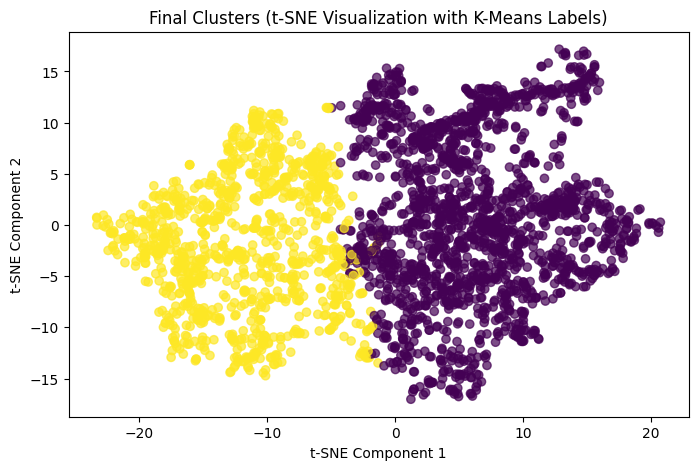

In [33]:

# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis
**- Explain why dimensionality reduction helped (or didn't) in clustering.**


Think of dimensionality reduction like creating a simpler map of a complex city.  t-SNE and PCA helped us create this simpler map by focusing on the most important parts of our data and getting rid of confusing details. This made it easier for K-Means to find clusters because the groups were more obvious and there was less noise to get in the way. However, DBSCAN works by looking at how close points are to each other in their original "neighborhoods."  Changing the map with dimensionality reduction can sometimes distort these neighborhoods, making it harder for DBSCAN to find accurate clusters.

**- Justify why certain clustering methods worked better.**

K-Means did a better job because it works best when clusters are shaped like neat, well-separated balls.  Our simplified map (after dimensionality reduction) made the data look more like this. K-Means tries to make these balls as tight as possible, which gave us well-defined groups. DBSCAN, on the other hand, is more like a detective looking for clues in a neighborhood. It's good at finding unusual shapes and outliers, but it can be thrown off by small changes and noise, especially after we changed the map with dimensionality reduction.



**- Relate findings to real-world clustering challenges.**

In real-world clustering applications, the choice of method depends on the data distribution. K-Means is effective for structured, well-separated clusters but struggles with non-uniform densities. DBSCAN, while useful for detecting anomalies and irregular shapes, can be sensitive to hyperparameters and noise. This highlights the importance of understanding the data and choose the right clustering methods.  Dimensionality reduction can help make the job easier, but we need to choose the clustering method to get the best results.





RESOURCES:

[DBSCAN](https://builtin.com/articles/dbscan#:~:text=What%20Is%20DBSCAN%3F-,Density%2Dbased%20spatial%20clustering%20of%20applications%20with%20noise%20(DBSCAN),data%20cleaning%20and%20outlier%20detection.)

